### Import the librarys. Ready to start running the program.

In [111]:
# import section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### Import the raw data and check if it has been correctly read.

In [112]:
table = pd.read_csv("./table.csv") #read the file
table.head() #show the top of table

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


### Confirm if there are any missing values in the dataset.

In [113]:
table.isnull().sum() # checking the values 

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

The values I need are fine, so I won't address the missing parts.

### Sort all works by IMBD Score.

In [114]:
df = pd.DataFrame(table)
df_sor = df.sort_values(by = 'imdb_score', ascending=False)
df_sor

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
622,622,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,tt3062514,9.6,3046.0
2787,2787,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,tt12635254,9.6,7.0
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.5,1727694.0
3144,3144,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,tt9253866,9.3,41386.0
3597,3597,ts90621,Kota Factory,SHOW,"Dedicated to Shrimati SL Loney ji, Shri Irodov...",2019,TV-MA,42,tt9432978,9.3,66985.0
...,...,...,...,...,...,...,...,...,...,...,...
4782,4782,ts280693,Thomas & Friends: All Engines Go!,SHOW,"In a reboot of the classic TV series, a younge...",2021,TV-Y,11,tt14556544,1.7,509.0
1101,1101,tm171891,Himmatwala,MOVIE,When a temple priest commits suicide after bei...,2013,NaN,150,tt2802286,1.7,8550.0
3355,3355,tm839411,Me Against You: Mr. S's Vendetta,MOVIE,A young couple who makes popular YouTube video...,2020,NaN,64,tt11559652,1.7,362.0
4648,4648,ts319303,He's Expecting,SHOW,When a successful ad executive who's got it al...,2022,TV-PG,26,tt14719276,1.6,2735.0


### Start analyzing the values.

### 1. View the Scores of the top 15 works.

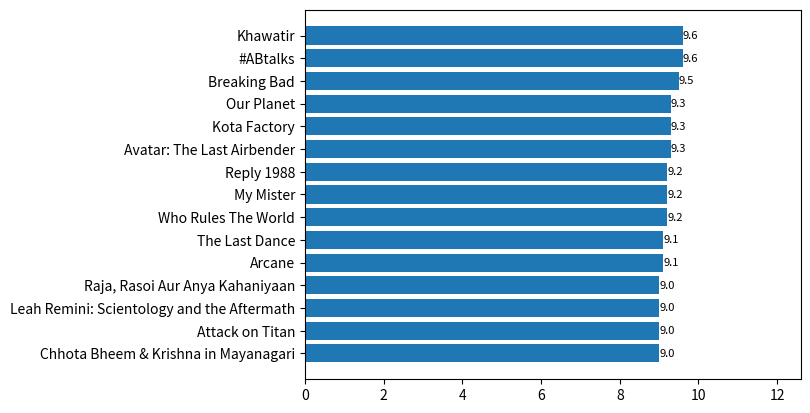

In [120]:
plt.rcParams['font.sans-serif'] = ['Noto Sans KR']

fig, ax = plt.subplots()

top_drama = df_sor['title'].head(15)
top_ratings = df_sor['imdb_score'].head(15)

top_ratings = top_ratings.astype(float)

ax.set_xlim(0, max(top_ratings) + 3)

bars = ax.barh(top_drama, top_ratings)
for bar in bars:
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(bar.get_width(), yval, round(bar.get_width(), 2), ha='left', va='center', color='black', fontsize=8)

plt.gca().invert_yaxis()

plt.show()

### 2. Check the playback time of the top 15 works.

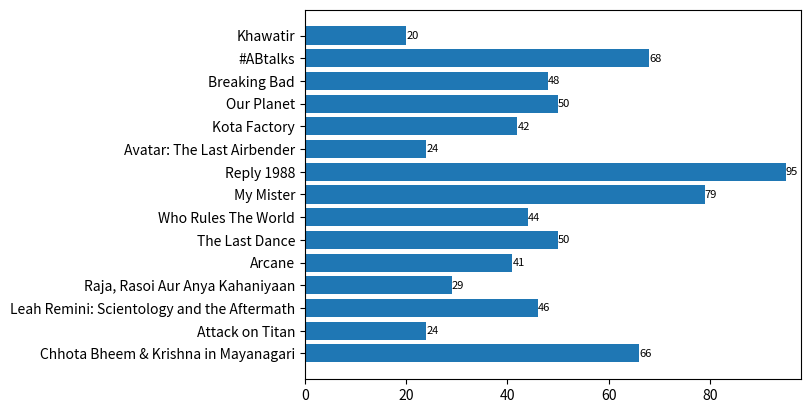

In [123]:
plt.rcParams['font.sans-serif'] = ['Noto Sans KR']

fig, ax = plt.subplots()

top_drama = df_sor['title'].head(15)
top_time = df_sor['runtime'].head(15)

ax.set_xlim(0, max(top_time) + 3)

bars = ax.barh(top_drama, top_time)
for bar in bars:
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(bar.get_width(), yval, round(bar.get_width(), 2), ha='left', va='center', color='black', fontsize=8)

plt.gca().invert_yaxis()

plt.show()